# Gammaverteilung

Die Gammaverteilung ist eine kontinuierliche Wahrscheinlichkeitsverteilung über der Menge der positiven reellen Zahlen. Sie ist einerseits eine direkte Verallgemeinerung der Exponentialverteilung und andererseits eine Verallgemeinerung der Erlang-Verteilung für nichtganzzahlige Parameter. Wie diese wird sie verwendet

- in der Warteschlangentheorie, um die Bedienzeiten oder Reparaturzeiten zu beschreiben.
- in der Versicherungsmathematik zur Modellierung kleinerer bis mittlerer Schäden.

# Zuerst mit zufällig gezogenen Stichproben ...


In [1]:
# Module importieren
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import scipy.stats as stats

# Spätere Diagramme im Stil 'seaborn' plotten
plt.style.use('seaborn')

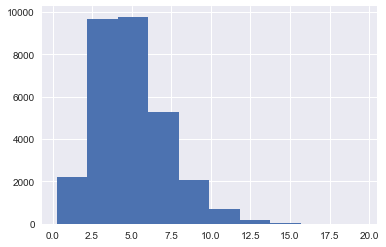

In [15]:
# Für die Generierung der Daten für das Histogramm erzeugen wir Zufallswerte mit Numpy. 
# Um bei  j e d e m  Programmdurchlauf dieselben Werte zu erhalten, 
# versehen wir den Zufallsgenerator mit dem Startwert 1.
np.random.seed(1)

# Zieht Stichproben von einer Gammaverteilung - mit den Parametern shape, scale und size:
x1 = np.random.gamma(shape=5, size=30000)
plt.hist(x1);

Wieviele Werte sind im Datensatz?

In [4]:
len(x1)

3000

Wie ist der Mittelwert?

In [5]:
x1.mean()

4.991234968020689

Wie ist die Standardabweichung?

In [6]:
x1.std()

2.27896133301652

# ... und jetzt (für Matthias) die wahre Verteilung

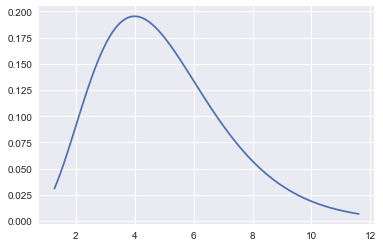

In [8]:
# das Ganze als Verteilungsfunktion
alpha = 5
lower = stats.gamma.ppf(0.01, alpha)
upper = stats.gamma.ppf(0.99, alpha)

x2 = scipy.linspace(lower,upper,100)
y2 = stats.gamma.pdf(x2, alpha)
plt.plot(x2, y2);

In [ ]:
y2 = stats.gamma

In [ ]:
y2 = stats.gamma.pdf

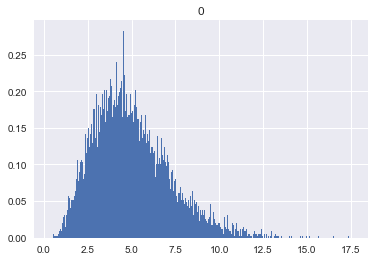

In [9]:
# das Ganze mal so eben auch als Histogramm
data_1 = pd.DataFrame(stats.gamma.rvs(alpha, size=10000))
data_1.hist(density=True, bins=500);

# Und zum Schluß das Beste: beide Diagramme zusammen

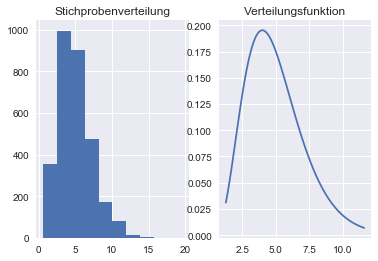

In [10]:
# erst nebeneinander
plt.subplot(121)   # subplot: Anzahl der Zeilen / Anzahl der Spalten / Bild Nummer
plt.hist(x1)
plt.title('Stichprobenverteilung')

plt.subplot(122)   # subplot: Anzahl der Zeilen / Anzahl der Spalten / Bild Nummer
plt.plot(x2, y2)
plt.title('Verteilungsfunktion');

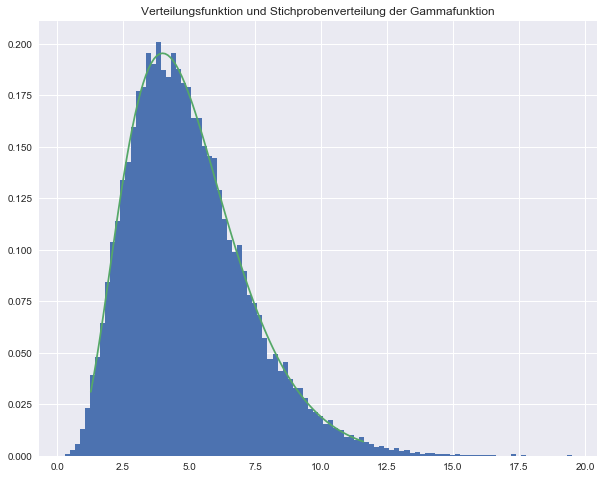

In [19]:
# dann ineinander
plt.figure(figsize=(10, 8))
plt.hist(x1, bins=100, density=True)
plt.plot(x2, y2)
plt.title('Verteilungsfunktion und Stichprobenverteilung der Gammafunktion')
plt.show()